Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0295
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038  
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030  
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 
Epoch 16/50
9

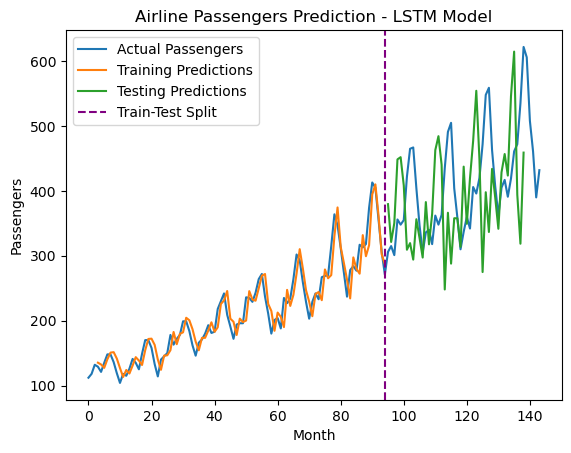

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

# Load the airline passengers dataset
dataframe = pd.read_csv("airline-passengers.csv")
dataframe['total_passengers'] = dataframe['total_passengers'].astype(float)

# Normalize the passenger data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(dataframe['total_passengers'].values.reshape(-1, 1))

# Split the data into training and testing sets (2/3 train, 1/3 test)
train_size = int(len(normalized_data) * 2 / 3)
train_set = normalized_data[:train_size]
test_set = normalized_data[train_size:]

# Prepare the dataset with a time step of 3 months
def create_dataset(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create training and testing datasets
X_train, y_train = create_dataset(train_set, 3)
X_test, y_test = create_dataset(test_set, 3)

# Reshape the data for the LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Use Input layer here
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Make predictions
train_predictions = lstm_model.predict(X_train)
test_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Plot the results
train_length = len(train_predictions)
plt.plot(dataframe['total_passengers'].values, label='Actual Passengers')
plt.plot(np.arange(3, train_length + 3), train_predictions[:, 0], label='Training Predictions')
plt.plot(np.arange(train_length + 3, train_length + len(test_predictions) + 3), test_predictions[:, 0], label='Testing Predictions')
plt.axvline(x=train_length + 2, color='purple', linestyle='--', label='Train-Test Split')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airline Passengers Prediction - LSTM Model')
plt.legend()
plt.show()

Epoch 1/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0027
Epoch 2/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.7015e-04
Epoch 3/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0276e-04
Epoch 4/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.2143e-05
Epoch 5/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.3663e-05
Epoch 6/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0558e-04
Epoch 7/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.4983e-05
Epoch 8/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.6607e-05
Epoch 9/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.3214e-05
Epoch 10/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.0543e-05
Epoch 11/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.4458e-05
Epoch 12/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.3320e-05
Epoch 13/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.8491e-05
Epoch 14/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/

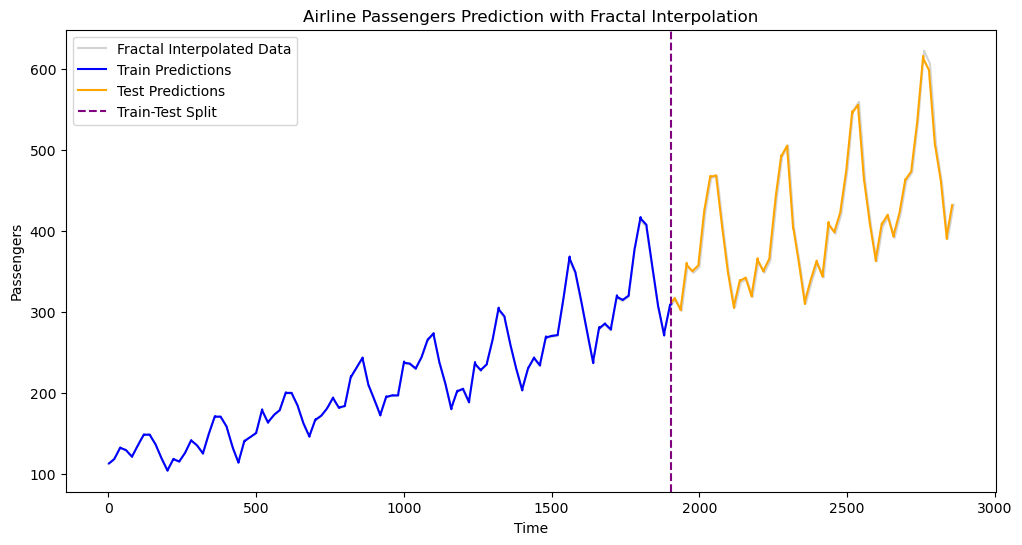

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

# Fractal interpolation function
def fractal_interpolation(data, interpolation_points=20, scaling_factor=0.1):
    interpolated_data = []
    for i in range(len(data) - 1):
        start, end = data[i], data[i + 1]
        interval = (end - start) / interpolation_points
        interpolated_data.append(start)
        
        for j in range(1, interpolation_points):
            new_point = start + j * interval + scaling_factor * (np.random.rand() - 0.5)
            interpolated_data.append(new_point)
            
    interpolated_data.append(data[-1])
    return np.array(interpolated_data)

# Load and preprocess data
data = pd.read_csv("airline-passengers.csv")
data['total_passengers'] = data['total_passengers'].astype(float)
passengers_data = data['total_passengers'].values

# Apply fractal interpolation to make the dataset fine-grained
fine_grained_data = fractal_interpolation(passengers_data, interpolation_points=20, scaling_factor=0.1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(fine_grained_data.reshape(-1, 1))

# Split data into train and test sets (2/3 train, 1/3 test)
train_size = int(len(scaled_data) * 2 / 3)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare data for LSTM
def create_dataset(dataset, time_step=3):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Generate train and test datasets
X_train, y_train = create_dataset(train_data, 3)
X_test, y_test = create_dataset(test_data, 3)

# Reshape data for LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model using Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Plot results
train_len = len(train_predict)
plt.figure(figsize=(12, 6))
plt.plot(fine_grained_data, label='Fractal Interpolated Data', color='lightgray')
plt.plot(np.arange(3, train_len + 3), train_predict[:, 0], label='Train Predictions', color='blue')
plt.plot(np.arange(train_len + 3, train_len + len(test_predict) + 3), test_predict[:, 0], label='Test Predictions', color='orange')
plt.axvline(x=train_len + 2, color='purple', linestyle='--', label='Train-Test Split')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers Prediction with Fractal Interpolation')
plt.legend()
plt.show()

Epoch 1/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0015
Epoch 2/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5891e-04
Epoch 3/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.7348e-05
Epoch 4/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1384e-04
Epoch 5/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2672e-04
Epoch 6/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.2234e-05
Epoch 7/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0321e-04
Epoch 8/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.3287e-05
Epoch 9/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.8878e-05
Epoch 10/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.2894e-05
Epoch 11/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.6828e-05
Epoch 12/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.2222e-05
Epoch 13/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.0695e-05
Epoch 14/50
1903/1903 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/s

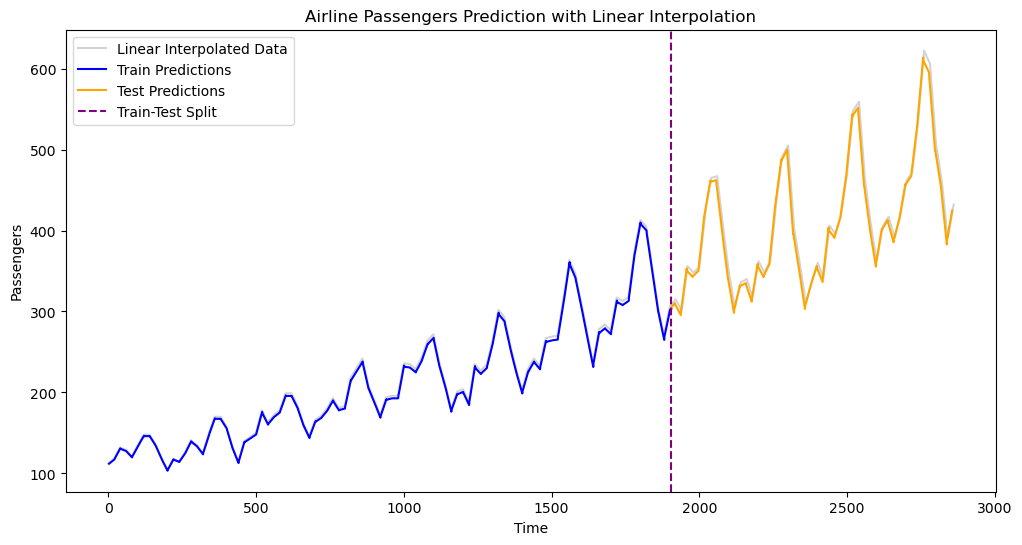

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

# Linear interpolation function
def linear_interpolation(data, interpolation_points=20):
    interpolated_data = []
    for i in range(len(data) - 1):
        start, end = data[i], data[i + 1]
        interval = (end - start) / interpolation_points
        interpolated_data.append(start)
        
        for j in range(1, interpolation_points):
            new_point = start + j * interval
            interpolated_data.append(new_point)
            
    interpolated_data.append(data[-1])
    return np.array(interpolated_data)

# Load and preprocess data
data = pd.read_csv("airline-passengers.csv")
data['total_passengers'] = data['total_passengers'].astype(float)
passengers_data = data['total_passengers'].values

# Apply linear interpolation to make the dataset fine-grained
fine_grained_data = linear_interpolation(passengers_data, interpolation_points=20)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(fine_grained_data.reshape(-1, 1))

# Split data into train and test sets (2/3 train, 1/3 test)
train_size = int(len(scaled_data) * 2 / 3)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare data for LSTM
def create_dataset(dataset, time_step=3):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Generate train and test datasets
X_train, y_train = create_dataset(train_data, 3)
X_test, y_test = create_dataset(test_data, 3)

# Reshape data for LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model using Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Plot results
train_len = len(train_predict)
plt.figure(figsize=(12, 6))
plt.plot(fine_grained_data, label='Linear Interpolated Data', color='lightgray')
plt.plot(np.arange(3, train_len + 3), train_predict[:, 0], label='Train Predictions', color='blue')
plt.plot(np.arange(train_len + 3, train_len + len(test_predict) + 3), test_predict[:, 0], label='Test Predictions', color='orange')
plt.axvline(x=train_len + 2, color='purple', linestyle='--', label='Train-Test Split')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers Prediction with Linear Interpolation')
plt.legend()
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from hurst import compute_Hc

# Linear interpolation function
def linear_interpolation(data, interpolation_points=20):
    interpolated_data = []
    for i in range(len(data) - 1):
        start, end = data[i], data[i + 1]
        interval = (end - start) / interpolation_points
        interpolated_data.append(start)
        
        for j in range(1, interpolation_points):
            new_point = start + j * interval
            interpolated_data.append(new_point)
            
    interpolated_data.append(data[-1])
    return np.array(interpolated_data)

# Fractal interpolation function
def fractal_interpolation(data, interpolation_points=20, scaling_factor=0.1):
    interpolated_data = []
    for i in range(len(data) - 1):
        start, end = data[i], data[i + 1]
        interval = (end - start) / interpolation_points
        interpolated_data.append(start)
        
        for j in range(1, interpolation_points):
            new_point = start + j * interval + scaling_factor * (np.random.rand() - 0.5)
            interpolated_data.append(new_point)
            
    interpolated_data.append(data[-1])
    return np.array(interpolated_data)

# Load and preprocess data
data = pd.read_csv("airline-passengers.csv")
data['total_passengers'] = data['total_passengers'].astype(float)
passengers_data = data['total_passengers'].values

# Apply fractal interpolation and linear interpolation
fine_grained_fractal_data = fractal_interpolation(passengers_data, interpolation_points=20)
fine_grained_linear_data = linear_interpolation(passengers_data, interpolation_points=20)

# Function to calculate the fractal dimension using box-counting method
def box_counting_dimension(data):
    # Normalize data to [0, 1] range
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    
    # Create a binary image by thresholding
    threshold = np.mean(normalized_data)
    binary_image = normalized_data > threshold
    
    # Calculate the box-counting dimension
    sizes = np.arange(1, len(data) // 2)  # Box sizes
    counts = []

    for size in sizes:
        # Count how many boxes of size `size` contain at least one point
        count = np.sum([1 for i in range(0, len(binary_image), size) if np.any(binary_image[i:i + size])])
        counts.append(count)
    
    # Fit the counts to a line on a log-log scale
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]  # Fractal dimension is the negative slope

# Calculate Hurst exponent and fractal dimension
def analyze_data(data):
    H, c, data_reg = compute_Hc(data, kind='price', simplified=True)
    fractal_dim = box_counting_dimension(data)
    return H, fractal_dim

# Analyze original data
H_original, fractal_dim_original = analyze_data(passengers_data)
# Analyze fractal interpolated data
H_fractal, fractal_dim_fractal = analyze_data(fine_grained_fractal_data)
# Analyze linear interpolated data
H_linear, fractal_dim_linear = analyze_data(fine_grained_linear_data)

# Print results
print(f"Original Data - Hurst Exponent: {H_original}, Fractal Dimension: {fractal_dim_original}")
print(f"Fractal Interpolated Data - Hurst Exponent: {H_fractal}, Fractal Dimension: {fractal_dim_fractal}")
print(f"Linear Interpolated Data - Hurst Exponent: {H_linear}, Fractal Dimension: {fractal_dim_linear}")

Original Data - Hurst Exponent: 0.8271960540657267, Fractal Dimension: 0.7762295112848304
Fractal Interpolated Data - Hurst Exponent: 0.27547988418230235, Fractal Dimension: 0.8071287041080975
Linear Interpolated Data - Hurst Exponent: 0.008586754718691181, Fractal Dimension: 0.8071287041080975


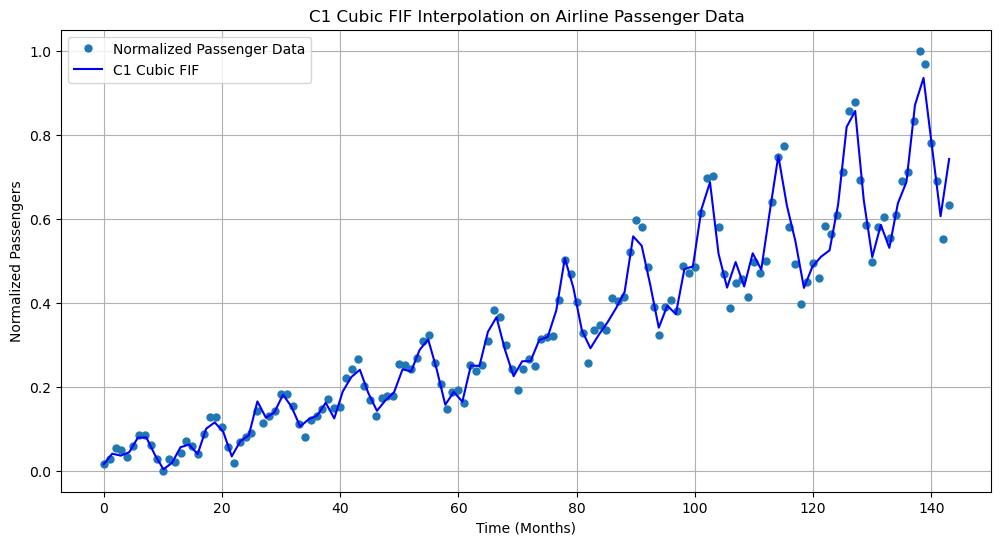

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
airline_data = pd.read_csv("airline-passengers.csv")  # Ensure the file path is correct
airline_data['total_passengers'] = airline_data['total_passengers'].astype(float)
passengers_data = airline_data['total_passengers'].values

# Generate x values corresponding to passenger data
x = np.arange(len(passengers_data))

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(passengers_data.reshape(-1, 1)).flatten()

# C1 cubic FIF for continuity
def cubic_fif_c1(x, y):
    n = len(x) - 1
    a = y[:-1]
    b = np.zeros(n)
    c = np.zeros(n)

    # Calculate coefficients for linear terms
    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

    # Solve for the cubic coefficients
    for i in range(1, n):
        c[i] = (b[i] - b[i - 1]) / (x[i] - x[i - 1])

    return a, b, c

# Get coefficients for C1 cubic FIF
a, b, c = cubic_fif_c1(x, scaled_data)

# Evaluate the cubic FIF
def evaluate_cubic_fif_c1(x_new, x, a, b, c):
    y_new = np.zeros_like(x_new)
    for i in range(len(x_new)):
        for j in range(len(x) - 1):
            if x[j] <= x_new[i] <= x[j + 1]:
                dx = x_new[i] - x[j]
                y_new[i] = a[j] + b[j] * dx + (c[j] / 2) * dx**2
                break
    return y_new

# Generate new x values for plotting
x_new = np.linspace(0, len(scaled_data) - 1, 100)

# Evaluate the C1 cubic FIF
y_c1 = evaluate_cubic_fif_c1(x_new, x, a, b, c)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, scaled_data, 'o', label='Normalized Passenger Data', markersize=5)
plt.plot(x_new, y_c1, label='C1 Cubic FIF', color='blue')
plt.title('C1 Cubic FIF Interpolation on Airline Passenger Data')
plt.xlabel('Time (Months)')
plt.ylabel('Normalized Passengers')
plt.legend()
plt.grid()
plt.show()

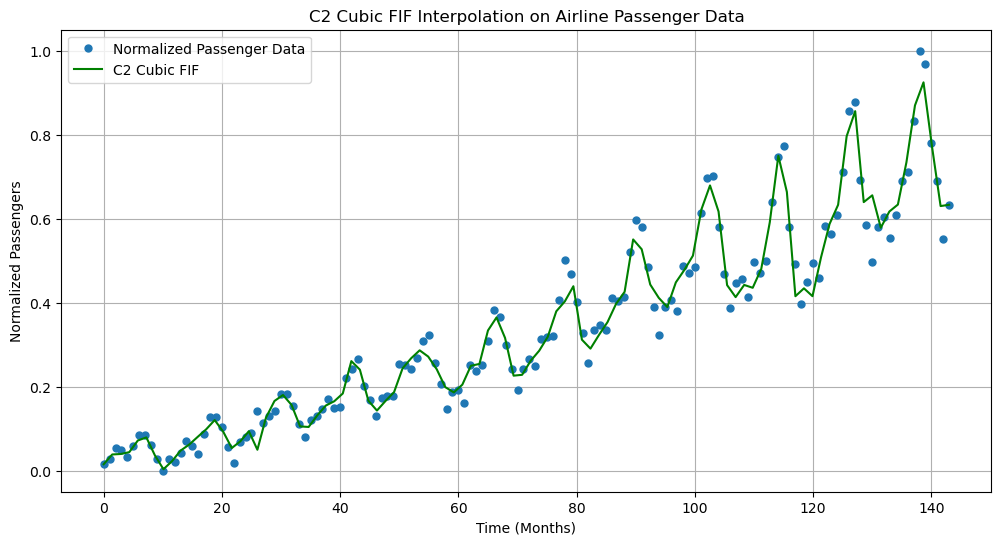

In [4]:
# C2 cubic FIF for continuity
def cubic_fif_c2(x, y):
    n = len(x) - 1
    a = y[:-1]
    b = np.zeros(n)
    c = np.zeros(n + 1)  # +1 for the boundary condition
    d = np.zeros(n)

    # Calculate coefficients for linear terms
    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

    # Calculate second derivatives (natural cubic)
    h = np.diff(x)
    alpha = np.zeros(n)

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (b[i] - b[i - 1])

    # Solve for the second derivatives
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)

    for i in range(1, n):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    # Back substitution
    l[n] = 1
    z[n] = 0
    c[n] = 0
    for j in range(n - 1, 0, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        d[j] = (c[j + 1] - c[j]) / h[j]

    return a, b, c, d

# Get coefficients for C2 cubic FIF
a, b, c, d = cubic_fif_c2(x, scaled_data)

# Evaluate the cubic FIF for C2
def evaluate_cubic_fif_c2(x_new, x, a, b, c, d):
    y_new = np.zeros_like(x_new)
    for i in range(len(x_new)):
        for j in range(len(x) - 1):
            if x[j] <= x_new[i] <= x[j + 1]:
                dx = x_new[i] - x[j]
                y_new[i] = (a[j] + b[j] * dx + c[j] * dx**2 + d[j] * dx**3)
                break
    return y_new

# Evaluate the C2 cubic FIF
y_c2 = evaluate_cubic_fif_c2(x_new, x, a, b, c, d)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, scaled_data, 'o', label='Normalized Passenger Data', markersize=5)
plt.plot(x_new, y_c2, label='C2 Cubic FIF', color='green')
plt.title('C2 Cubic FIF Interpolation on Airline Passenger Data')
plt.xlabel('Time (Months)')
plt.ylabel('Normalized Passengers')
plt.legend()
plt.grid()
plt.show()

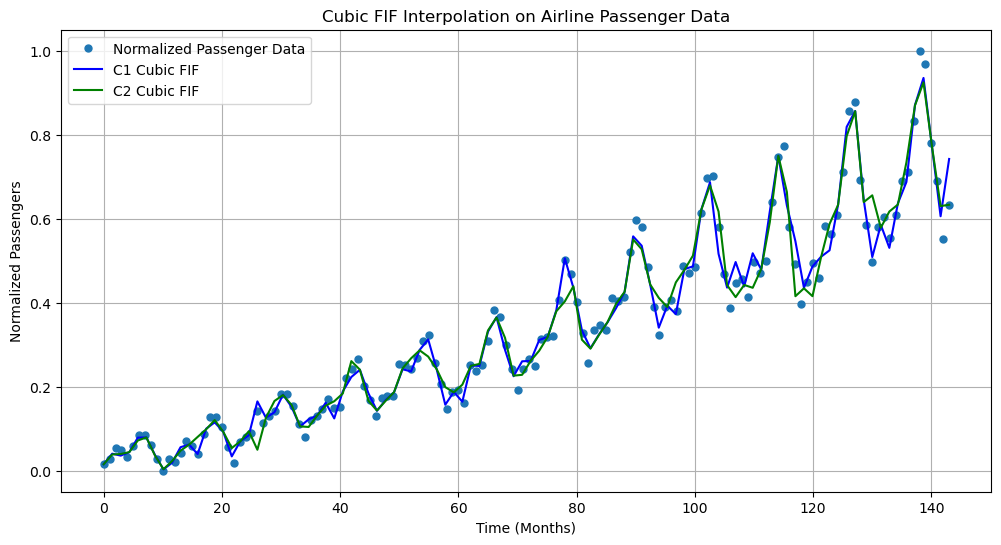

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
airline_data = pd.read_csv("airline-passengers.csv")  # Ensure the file path is correct
airline_data['total_passengers'] = airline_data['total_passengers'].astype(float)
passengers_data = airline_data['total_passengers'].values

# Generate x values corresponding to passenger data
x = np.arange(len(passengers_data))

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(passengers_data.reshape(-1, 1)).flatten()

# C1 cubic FIF for continuity
def cubic_fif_c1(x, y):
    n = len(x) - 1
    a = y[:-1]
    b = np.zeros(n)
    c = np.zeros(n)

    # Calculate coefficients for linear terms
    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

    # Solve for the cubic coefficients
    for i in range(1, n):
        c[i] = (b[i] - b[i - 1]) / (x[i] - x[i - 1])

    return a, b, c

# C2 cubic FIF for continuity
def cubic_fif_c2(x, y):
    n = len(x) - 1
    a = y[:-1]
    b = np.zeros(n)
    c = np.zeros(n + 1)  # +1 for the boundary condition
    d = np.zeros(n)

    # Calculate coefficients for linear terms
    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

    # Calculate second derivatives (natural cubic)
    h = np.diff(x)
    alpha = np.zeros(n)

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (b[i] - b[i - 1])

    # Solve for the second derivatives
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)

    for i in range(1, n):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    # Back substitution
    l[n] = 1
    z[n] = 0
    c[n] = 0
    for j in range(n - 1, 0, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        d[j] = (c[j + 1] - c[j]) / h[j]

    return a, b, c, d

# Evaluate the cubic FIF for C1
def evaluate_cubic_fif_c1(x_new, x, a, b, c):
    y_new = np.zeros_like(x_new)
    for i in range(len(x_new)):
        for j in range(len(x) - 1):
            if x[j] <= x_new[i] <= x[j + 1]:
                dx = x_new[i] - x[j]
                y_new[i] = a[j] + b[j] * dx + (c[j] / 2) * dx**2
                break
    return y_new

# Evaluate the cubic FIF for C2
def evaluate_cubic_fif_c2(x_new, x, a, b, c, d):
    y_new = np.zeros_like(x_new)
    for i in range(len(x_new)):
        for j in range(len(x) - 1):
            if x[j] <= x_new[i] <= x[j + 1]:
                dx = x_new[i] - x[j]
                y_new[i] = (a[j] + b[j] * dx + c[j] * dx**2 + d[j] * dx**3)
                break
    return y_new

# Get coefficients for C1 and C2 cubic FIF
a_c1, b_c1, c_c1 = cubic_fif_c1(x, scaled_data)
a_c2, b_c2, c_c2, d_c2 = cubic_fif_c2(x, scaled_data)

# Generate new x values for plotting
x_new = np.linspace(0, len(scaled_data) - 1, 100)

# Evaluate the C1 and C2 cubic FIF
y_c1 = evaluate_cubic_fif_c1(x_new, x, a_c1, b_c1, c_c1)
y_c2 = evaluate_cubic_fif_c2(x_new, x, a_c2, b_c2, c_c2, d_c2)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, scaled_data, 'o', label='Normalized Passenger Data', markersize=5)
plt.plot(x_new, y_c1, label='C1 Cubic FIF', color='blue')
plt.plot(x_new, y_c2, label='C2 Cubic FIF', color='green')
plt.title('Cubic FIF Interpolation on Airline Passenger Data')
plt.xlabel('Time (Months)')
plt.ylabel('Normalized Passengers')
plt.legend()
plt.grid()
plt.show()